# Comparison between SVM, KNN and ANN Predicting Heart Disease

dataset:
    https://www.openml.org/d/1498

## Import Data 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Data Preprocessing 

In [3]:
data = pd.read_csv('phpgNaXZe.csv')
data 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,2,64,28.45,0.00,58,1
458,182,4.20,4.41,32.10,2,52,28.61,18.72,52,2
459,108,3.00,1.59,15.23,2,40,20.09,26.64,55,1
460,118,5.40,11.61,30.79,2,64,27.35,23.97,40,1


In [4]:
data.columns=['sbp', 'tabacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']
data

,sbp,tabacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,2,64,28.45,0.00,58,1
458,182,4.20,4.41,32.10,2,52,28.61,18.72,52,2
459,108,3.00,1.59,15.23,2,40,20.09,26.64,55,1
460,118,5.40,11.61,30.79,2,64,27.35,23.97,40,1


## Encode the Data 

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['famhist']= encoder.fit_transform(data['famhist'])
data['chd'] = encoder.fit_transform(data['chd'])

data 

,sbp,tabacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,1,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,1,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,1,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,1,64,27.35,23.97,40,0


In [7]:
data.describe()

,sbp,tabacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

In [9]:
# setting scale of max min value for sbp in range of 0-100, normalise
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [10]:
data

,sbp,tabacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,96.581197,0.40,5.98,31.72,1,64,28.45,0.00,58,0
458,69.230769,4.20,4.41,32.10,1,52,28.61,18.72,52,1
459,5.982906,3.00,1.59,15.23,1,40,20.09,26.64,55,0
460,14.529915,5.40,11.61,30.79,1,64,27.35,23.97,40,0


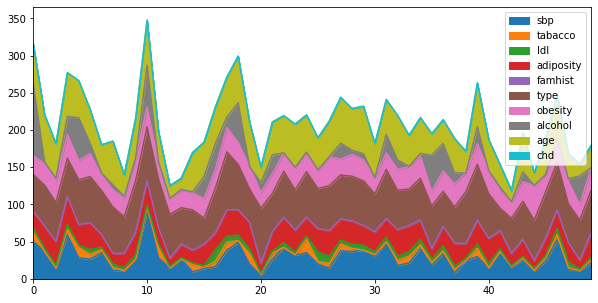

In [11]:
data.head(50).plot(kind='area',figsize=(10,5))

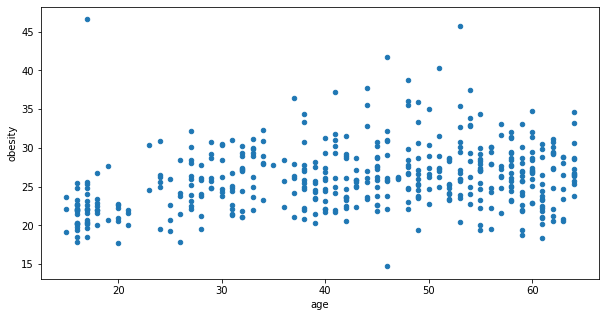

In [12]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5))

In [15]:
data.columns

Index(['sbp', 'tabacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

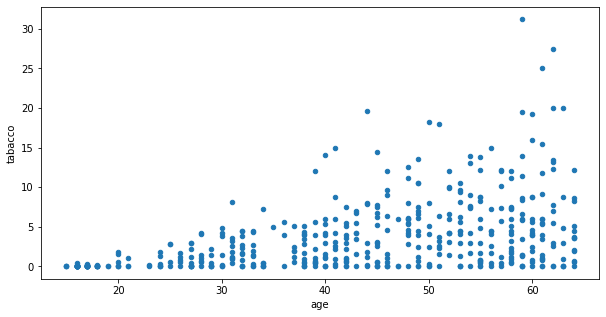

In [16]:
data.plot(x='age',y='tabacco',kind='scatter',figsize =(10,5))

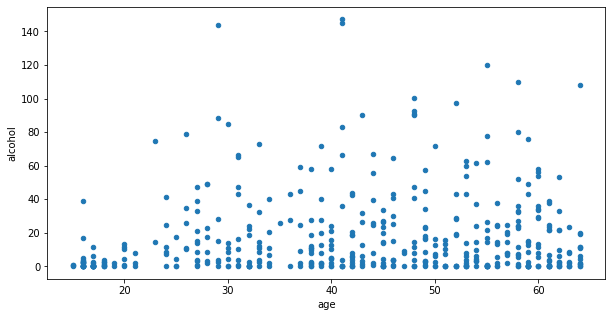

In [17]:

data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5))

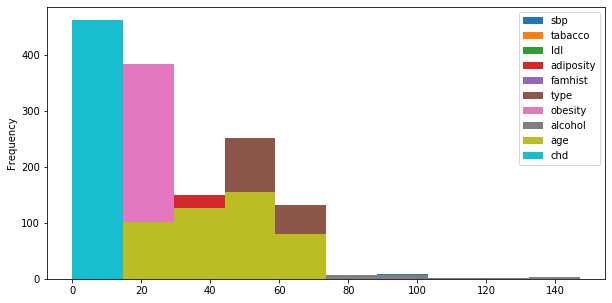

In [18]:

data.plot(kind = 'hist',figsize =(10,5))

In [19]:

color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

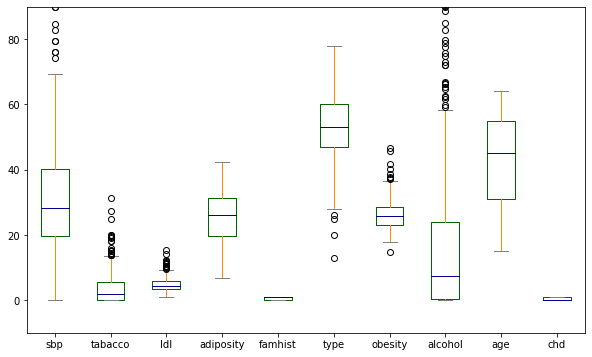

In [20]:
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90])

In [22]:

# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['sbp','tabacco','ldl','adiposity','famhist','type','obesity','alcohol','age']
X_train, X_test, y_train, y_test = train_test_split(data[col], data['chd'], test_size=0.2, random_state=1234)

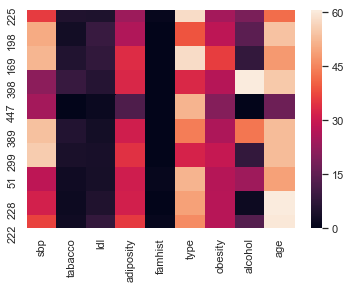

In [23]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [24]:

X_all = data[col]
y_all = data['chd']

In [25]:
X_all

,sbp,tabacco,ldl,adiposity,famhist,type,obesity,alcohol,age
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,96.581197,0.40,5.98,31.72,1,64,28.45,0.00,58
458,69.230769,4.20,4.41,32.10,1,52,28.61,18.72,52
459,5.982906,3.00,1.59,15.23,1,40,20.09,26.64,55
460,14.529915,5.40,11.61,30.79,1,64,27.35,23.97,40


In [26]:
y_all

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

## SVM 

In [27]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [28]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred_svm =svm_clf.predict(X_test)

In [30]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [31]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[51,  9],
       [15, 18]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.7419354838709677


In [33]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.85, 0.7391304347826086)

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [35]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[49, 11],
       [22, 11]], dtype=int64)

In [38]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.6451612903225806

In [39]:
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.8166666666666667, 0.8166666666666667)

##  ANN Multilayer Perceptron Classifier

In [58]:

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [59]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [60]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [61]:

# Fit the best algorithm to the data 
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=14, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
y_pred_ann = ann_clf.predict(X_test)

In [63]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[60,  0],
       [33,  0]], dtype=int64)

In [64]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.6451612903225806

In [65]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(1.0, 1.0)

In [66]:

import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
369/369 [==============================] - 0s 732us/step - loss: 0.6675 - acc: 0.6558
Epoch 2/100
369/369 [==============================] - 0s 86us/step - loss: 0.6611 - acc: 0.6558
Epoch 3/100
369/369 [==============================] - 0s 84us/step - loss: 0.6618 - acc: 0.6504
Epoch 4/100
369/369 [==============================] - 0s 81us/step - loss: 0.6516 - acc: 0.6558
Epoch 5/100
369/369 [==============================] - 0s 73us/step - loss: 0.6443 - acc: 0.6612
Epoch 6/100
369/369 [==============================] - 0s 81us/step - loss: 0.6339 - acc: 0.6558
Epoch 7/100
369/369 [==============================] - 0s 78us/step - loss: 0.6329 - acc: 0.6667
Epoch 8/100
369/369 [==============================] - 0s 81us/step - loss: 0.6185 - acc: 0.6667
Epoch 9/100
369/369 [==============================] - 0s 84us/step - loss: 0.6139 - acc: 0.6721
Epoch 10/100
369/369 [==============================] - 0s 70us/step - loss: 0.6081 - acc: 0.6802
Epoch 11/100
369/369 [======

369/369 [==============================] - 0s 84us/step - loss: 0.5406 - acc: 0.7317
Epoch 85/100
369/369 [==============================] - 0s 92us/step - loss: 0.5353 - acc: 0.7182
Epoch 86/100
369/369 [==============================] - 0s 95us/step - loss: 0.5329 - acc: 0.7398
Epoch 87/100
369/369 [==============================] - 0s 95us/step - loss: 0.5360 - acc: 0.7371
Epoch 88/100
369/369 [==============================] - 0s 89us/step - loss: 0.5415 - acc: 0.7073
Epoch 89/100
369/369 [==============================] - 0s 119us/step - loss: 0.5433 - acc: 0.7290
Epoch 90/100
369/369 [==============================] - 0s 100us/step - loss: 0.5375 - acc: 0.7344
Epoch 91/100
369/369 [==============================] - 0s 97us/step - loss: 0.5340 - acc: 0.7480
Epoch 92/100
369/369 [==============================] - 0s 103us/step - loss: 0.5456 - acc: 0.7182
Epoch 93/100
369/369 [==============================] - 0s 92us/step - loss: 0.5366 - acc: 0.7398
Epoch 94/100
369/369 [========

In [67]:
cm_annk

array([[51,  9],
       [16, 17]], dtype=int64)

In [68]:
recall_annk = cm_annk[0][0]/(cm_annk[0][0] + cm_annk[0][1])
precision_annk = cm_annk[0][0]/(cm_annk[0][0]+cm_annk[1][1])
recall_annk,precision_annk

(0.85, 0.75)

## Comparison of models

In [69]:

results ={'Accuracy': [svm_result*100,knn_result*100,ann_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_ann*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_ann*100]}
index = ['SVM','KNN','ANN']

In [70]:
results =pd.DataFrame(results,index=index)

In [72]:
results

,Accuracy,Recall,Precision
SVM,74.193548,85.000000,73.913043
KNN,64.516129,81.666667,81.666667
ANN,64.516129,100.000000,100.000000


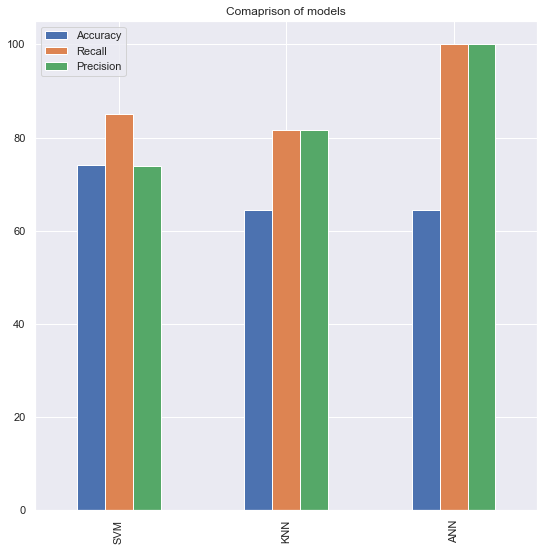

In [73]:

fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')

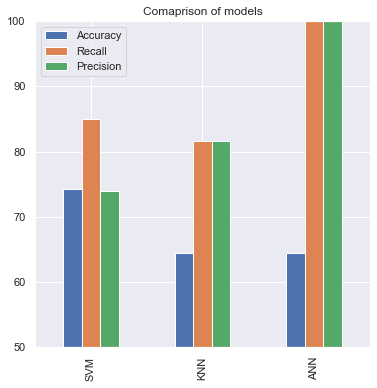

In [74]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(6,6),ylim=[50,100]).get_figure()
fig.savefig('image.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281FEB1B7B8>,
      dtype=object)

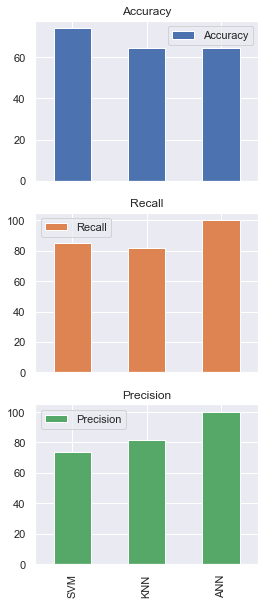

In [75]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))